In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

from yellowbrick.model_selection import learning_curve


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.utils import shuffle as shf
import pickle
import os
import glob as gb

In [2]:
code = {'NORMAL':0 ,'PNEUMONIA':1}
def getcode(n) :
    for x , y in code.items() :
        if n == y :
            return x

In [4]:
#the directory that contain the train images set
train_path='../data/chest_xray/train/'

X_train = []
y_train = []
for folder in  os.listdir(train_path) :
    files = gb.glob(pathname= str( train_path + folder + '/*.jpeg'))
    for file in files:
        image = cv2.imread(file)
        image_array = cv2.resize(image , (64,64))
        X_train.append(list(image_array))
        y_train.append(code[folder])
np.save('./npy/X_train',X_train)
np.save('./npy/y_train',y_train)

In [5]:
#the directory that contain the test images set
test_path='../data/chest_xray/test/'

X_test = []
y_test = []
for folder in  os.listdir(test_path) : 
    files = gb.glob(pathname= str( test_path + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (64,64))
        X_test.append(list(image_array))
        y_test.append(code[folder])
np.save('./npy/X_test',X_test)
np.save('./npy/y_test',y_test)

In [7]:
loaded_X_train = np.load('./npy/X_train.npy')
loaded_X_test = np.load('./npy/X_test.npy')
loaded_y_train = np.load('./npy/y_train.npy')
loaded_y_test = np.load('./npy/y_test.npy')

In [8]:
print(loaded_X_train.shape)
print(loaded_X_test.shape)

(5216, 64, 64, 3)


In [9]:
print(loaded_y_train.shape)
print(loaded_y_test.shape)

(5216,)
(624,)


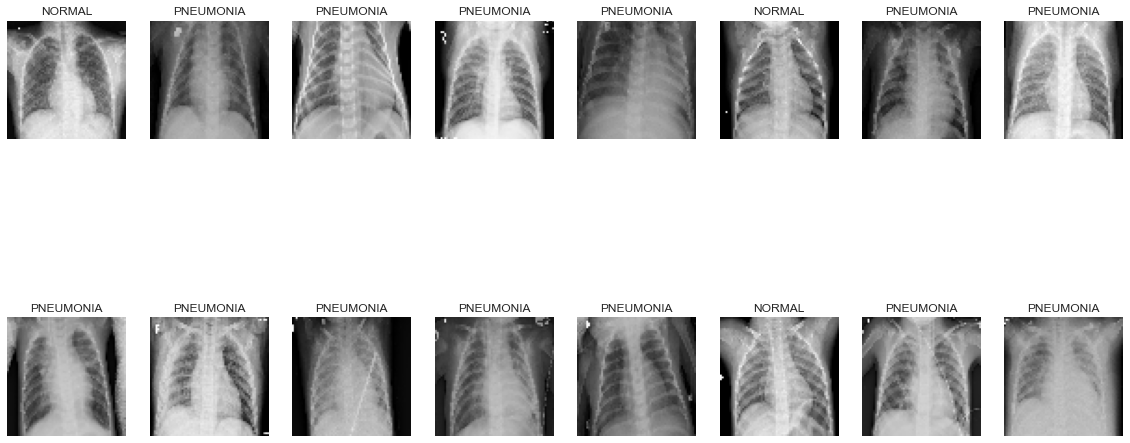

In [10]:
plt.figure(figsize=(20,10))
for n , i in enumerate(np.random.randint(0,len(loaded_X_train),16)): 
    plt.subplot(2,8,n+1)
    plt.imshow(loaded_X_train[i])
    plt.axis('off')
    plt.title(getcode(loaded_y_train[i]))

C:\Users\imaji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


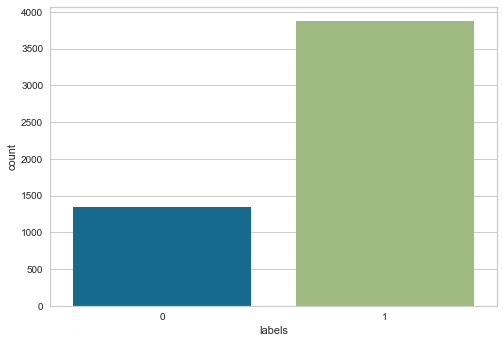

In [11]:
df_train = pd.DataFrame()
df_train["labels"]= loaded_y_train
lab = df_train['labels']
dist = lab.value_counts()
sns.countplot(lab)
plt.show()

C:\Users\imaji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


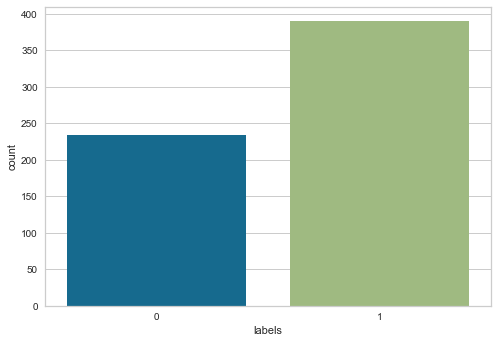

In [12]:
df_test = pd.DataFrame()
df_test["labels"]= loaded_y_test
lab = df_test['labels']
dist = lab.value_counts()
#play with pallette colors
sns.countplot(lab)
plt.show()

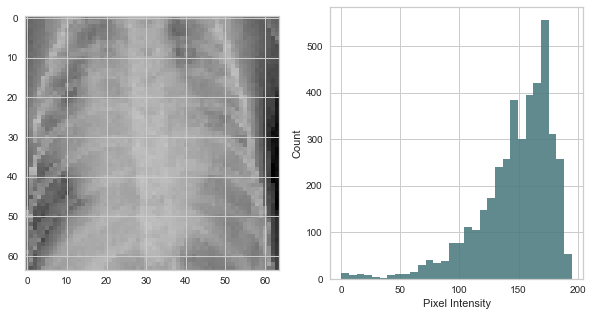

In [14]:
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5)
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5)

plotHistogram(loaded_X_train[np.random.randint(len(loaded_X_train))])

In [15]:
X_train = loaded_X_train.reshape([-1, np.product((64,64,3))])
X_test = loaded_X_test.reshape([-1, np.product((64,64,3))])

In [16]:
print(X_train.shape)
print(X_test.shape)

(5216, 12288)
(624, 12288)


In [17]:
y_train = loaded_y_train
y_test = loaded_y_test

In [18]:
X_train, y_train = shf(X_train, y_train, random_state=15)
X_test, y_test = shf(X_test, y_test, random_state=15)

In [19]:
knn = KNeighborsClassifier(n_neighbors=10)
log_reg  = LogisticRegression()
dtc  = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svm = SVC()

In [20]:
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
svm.fit(X_train, y_train)

C:\Users\imaji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [21]:
knn_predcited = knn.predict(X_test)
log_reg_predcited = log_reg.predict(X_test)
dtc_predcited = dtc.predict(X_test)
rfc_predcited = rfc.predict(X_test)
svm_predcited = svm.predict(X_test)

In [24]:
#function to plot the confusion matrix for each model
def plot_cm(predictions, y_test, title):
  labels = ['Normal', 'Pnuemonia']
  cm = confusion_matrix(y_test,predictions)
  cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
  plt.figure(figsize = (7,7))
  plt.title(title)
  sns.heatmap(cm, linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)
  plt.show()

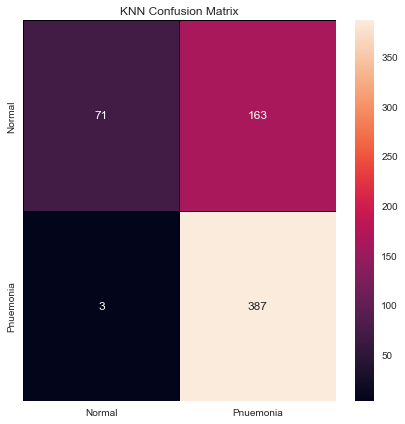

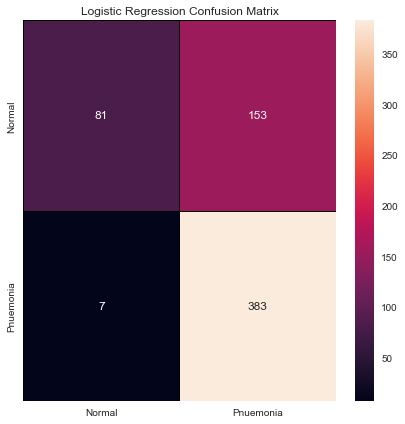

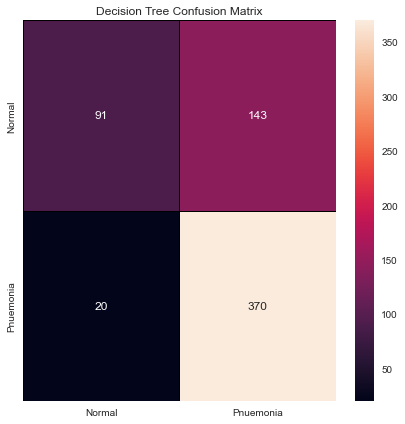

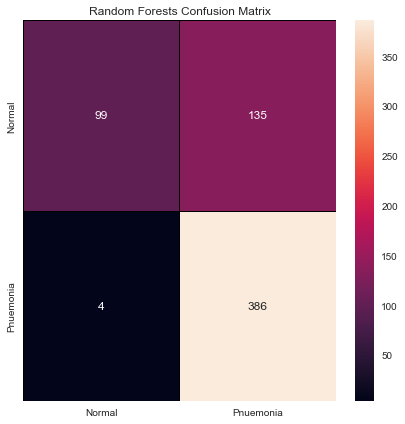

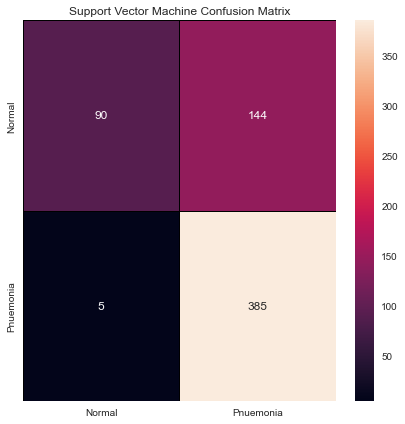

In [25]:
plot_cm(knn_predcited, y_test, 'KNN Confusion Matrix')

plot_cm(log_reg_predcited, y_test, 'Logistic Regression Confusion Matrix') 
    
plot_cm(dtc_predcited, y_test, 'Decision Tree Confusion Matrix')

plot_cm(rfc_predcited, y_test, 'Random Forests Confusion Matrix')

plot_cm(svm_predcited, y_test, 'Support Vector Machine Confusion Matrix')

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [27]:
pca = PCA(.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [28]:
print('Number of components after PCA: ' + str(pca.n_components_))

Number of components after PCA: 546


In [29]:
knn_PCA = KNeighborsClassifier(n_neighbors=10)
log_reg_PCA  = LogisticRegression()
dtc_PCA  = DecisionTreeClassifier()
rfc_PCA = RandomForestClassifier()
svm_PCA = SVC()

In [30]:
knn_PCA.fit(X_train, y_train)
log_reg_PCA.fit(X_train, y_train)
dtc_PCA.fit(X_train, y_train)
rfc_PCA.fit(X_train, y_train)
svm_PCA.fit(X_train, y_train)

C:\Users\imaji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [31]:
print('KNN accuracy score is: ' + str(knn_PCA.score(X_test, y_test)))
print('Logistic Regression accuracy score is: ' + str(log_reg_PCA.score(X_test, y_test)))
print('Decision Tree Classifier accuracy score is: ' + str(dtc_PCA.score(X_test, y_test)))
print('Random forests Classifier accuracy score is: ' + str(rfc_PCA.score(X_test, y_test)))
print('Support Vector Machine Classifier accuracy score is: ' + str(svm_PCA.score(X_test, y_test)))

KNN accuracy score is: 0.7596153846153846
Logistic Regression accuracy score is: 0.7772435897435898
Decision Tree Classifier accuracy score is: 0.7660256410256411
Random forests Classifier accuracy score is: 0.7227564102564102
Support Vector Machine Classifier accuracy score is: 0.7996794871794872


In [32]:
knn_PCA_predcited = knn_PCA.predict(X_test)
log_reg_PCA_predcited = log_reg_PCA.predict(X_test)
dtc_PCA_predcited = dtc_PCA.predict(X_test)
rfc_PCA_predcited = rfc_PCA.predict(X_test)
svm_PCA_predcited = svm_PCA.predict(X_test)

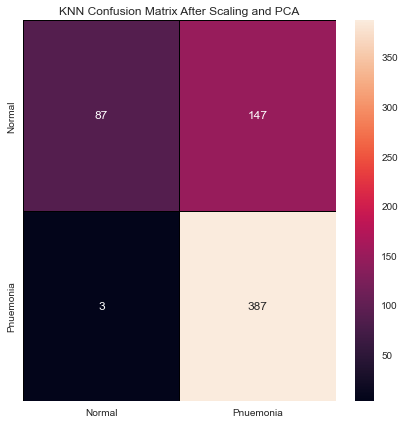

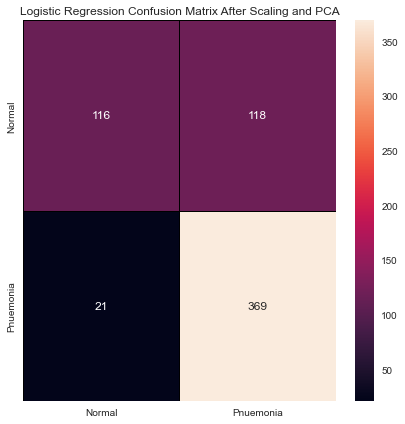

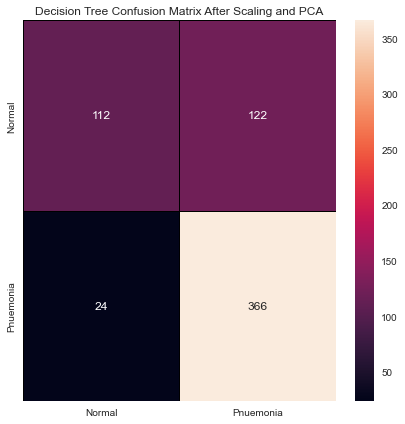

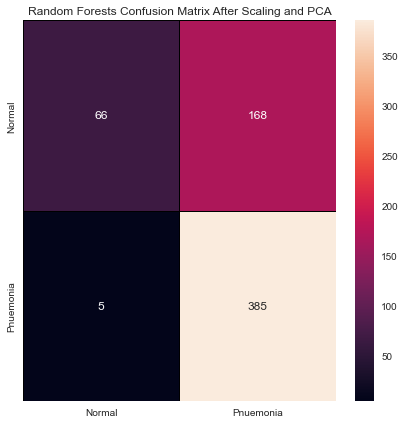

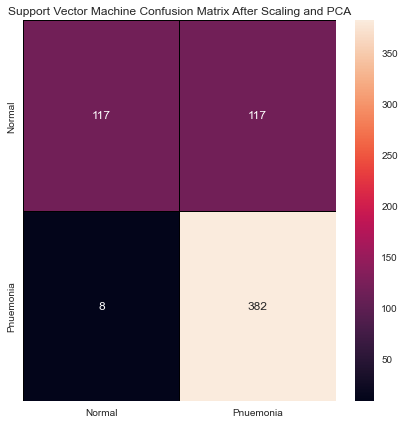

In [33]:

plot_cm(knn_PCA_predcited, y_test, 'KNN Confusion Matrix After Scaling and PCA')

plot_cm(log_reg_PCA_predcited, y_test, 'Logistic Regression Confusion Matrix After Scaling and PCA') 
    
plot_cm(dtc_PCA_predcited, y_test, 'Decision Tree Confusion Matrix After Scaling and PCA')

plot_cm(rfc_PCA_predcited, y_test, 'Random Forests Confusion Matrix After Scaling and PCA')

plot_cm(svm_PCA_predcited, y_test, 'Support Vector Machine Confusion Matrix After Scaling and PCA')

In [34]:
smote = SMOTE(random_state = 11)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [35]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(7750, 546)
(7750,)


In [36]:
knn_smote = KNeighborsClassifier(n_neighbors=10)
log_reg_smote  = LogisticRegression()
dtc_smote  = DecisionTreeClassifier()
rfc_smote = RandomForestClassifier()
svm_smote = SVC()

In [37]:
knn_smote.fit(X_train_smote, y_train_smote)
log_reg_smote.fit(X_train_smote, y_train_smote)
dtc_smote.fit(X_train_smote, y_train_smote)
rfc_smote.fit(X_train_smote, y_train_smote)
svm_smote.fit(X_train_smote, y_train_smote)

C:\Users\imaji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [38]:
print('KNN accuracy score is: ' + str(knn_smote.score(X_test, y_test)))
print('Logistic Regression accuracy score is: ' + str(log_reg_smote.score(X_test, y_test)))
print('Decision Tree Classifier accuracy score is: ' + str(dtc_smote.score(X_test, y_test)))
print('Random forests Classifier accuracy score is: ' + str(rfc_smote.score(X_test, y_test)))
print('Support Vector Machine Classifier accuracy score is: ' + str(svm_smote.score(X_test, y_test)))

KNN accuracy score is: 0.8301282051282052
Logistic Regression accuracy score is: 0.7868589743589743
Decision Tree Classifier accuracy score is: 0.7628205128205128
Random forests Classifier accuracy score is: 0.7788461538461539
Support Vector Machine Classifier accuracy score is: 0.8141025641025641


In [39]:
knn_smote_predcited = knn_smote.predict(X_test)
log_reg_smote_predcited = log_reg_smote.predict(X_test)
dtc_smote_predcited = dtc_smote.predict(X_test)
rfc_smote_predcited = rfc_smote.predict(X_test)
svm_smote_predcited = svm_smote.predict(X_test)

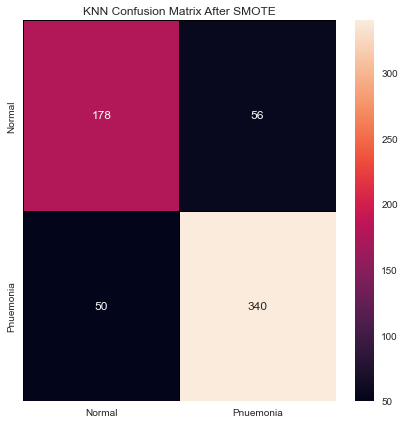

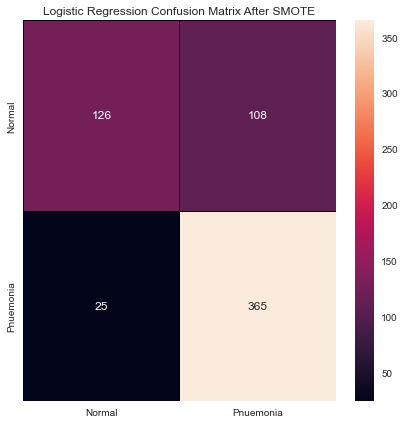

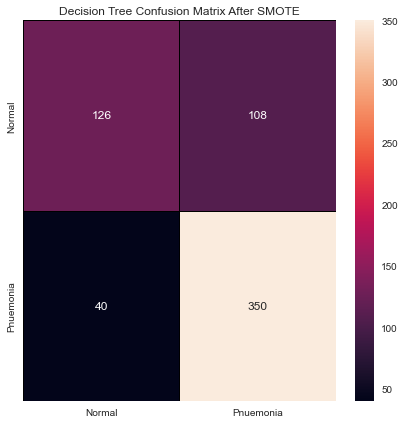

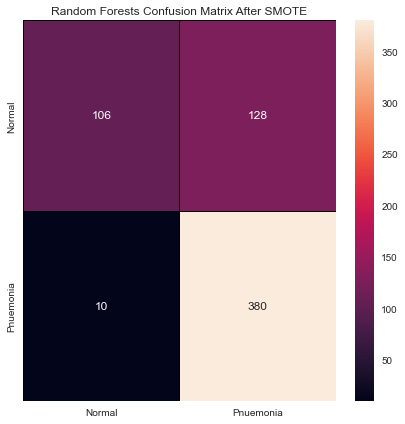

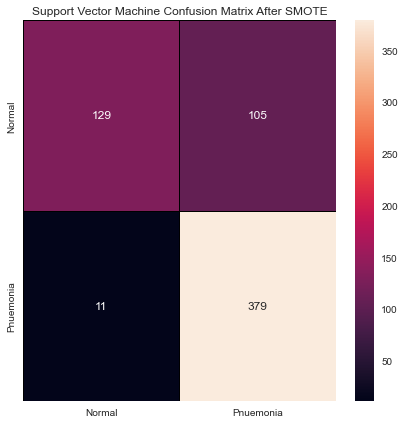

In [40]:
plot_cm(knn_smote_predcited, y_test, 'KNN Confusion Matrix After SMOTE')

plot_cm(log_reg_smote_predcited, y_test, 'Logistic Regression Confusion Matrix After SMOTE') 
    
plot_cm(dtc_smote_predcited, y_test, 'Decision Tree Confusion Matrix After SMOTE')

plot_cm(rfc_smote_predcited, y_test, 'Random Forests Confusion Matrix After SMOTE')

plot_cm(svm_smote_predcited, y_test, 'Support Vector Machine Confusion Matrix After SMOTE')

In [41]:
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))


In [42]:
X_smote_tomek, y_smote_tomek= resample.fit_resample(X_train, y_train)

In [43]:
print(X_smote_tomek.shape)
print(y_smote_tomek.shape)

(7749, 546)
(7749,)


In [44]:
knn_smote_tomek = KNeighborsClassifier(n_neighbors=10)
log_reg_smote_tomek  = LogisticRegression()
dtc_smote_tomek  = DecisionTreeClassifier()
rfc_smote_tomek = RandomForestClassifier()
svm_smote_tomek = SVC()

In [45]:
knn_smote_tomek.fit(X_smote_tomek, y_smote_tomek)
log_reg_smote_tomek.fit(X_smote_tomek, y_smote_tomek)
dtc_smote_tomek.fit(X_smote_tomek, y_smote_tomek)
rfc_smote_tomek.fit(X_smote_tomek, y_smote_tomek)
svm_smote_tomek.fit(X_smote_tomek, y_smote_tomek)

C:\Users\imaji\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [46]:
print('KNN accuracy score is: ' + str(knn_smote_tomek.score(X_test, y_test)))
print('Logistic Regression accuracy score is: ' + str(log_reg_smote_tomek.score(X_test, y_test)))
print('Decision Tree Classifier accuracy score is: ' + str(dtc_smote_tomek.score(X_test, y_test)))
print('Random forests Classifier accuracy score is: ' + str(rfc_smote_tomek.score(X_test, y_test)))
print('Support Vector Machine Classifier accuracy score is: ' + str(svm_smote_tomek.score(X_test, y_test)))

KNN accuracy score is: 0.8253205128205128
Logistic Regression accuracy score is: 0.780448717948718
Decision Tree Classifier accuracy score is: 0.7355769230769231
Random forests Classifier accuracy score is: 0.7756410256410257
Support Vector Machine Classifier accuracy score is: 0.8108974358974359


In [47]:
knn_smote_tomek_predcited = knn_smote_tomek.predict(X_test)
log_reg_smote_tomek_predcited = log_reg_smote_tomek.predict(X_test)
dtc_smote_tomek_predcited = dtc_smote_tomek.predict(X_test)
rfc_smote_tomek_predcited = rfc_smote_tomek.predict(X_test)
svm_smote_tomek_predcited = svm_smote_tomek.predict(X_test)

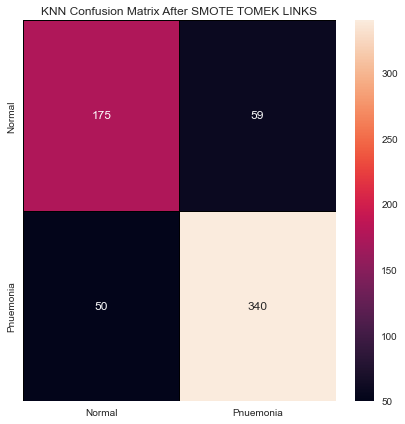

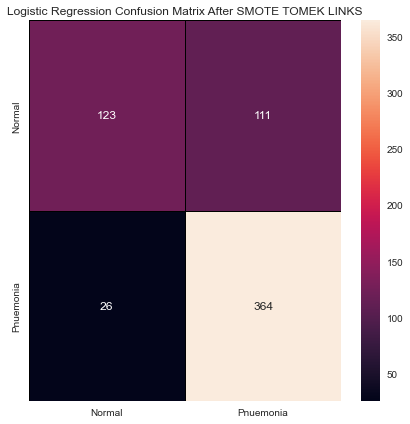

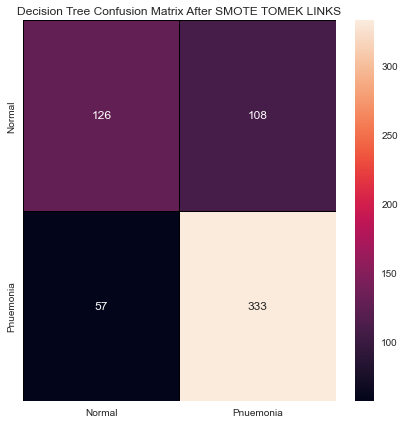

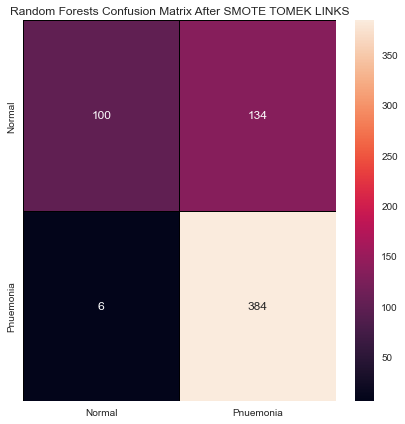

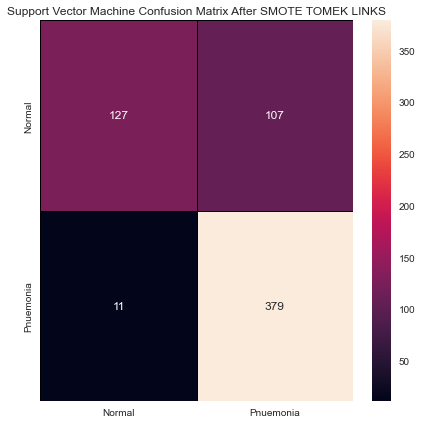

In [48]:
plot_cm(knn_smote_tomek_predcited, y_test, 'KNN Confusion Matrix After SMOTE TOMEK LINKS')

plot_cm(log_reg_smote_tomek_predcited, y_test, 'Logistic Regression Confusion Matrix After SMOTE TOMEK LINKS') 
    
plot_cm(dtc_smote_tomek_predcited, y_test, 'Decision Tree Confusion Matrix After SMOTE TOMEK LINKS')

plot_cm(rfc_smote_tomek_predcited, y_test, 'Random Forests Confusion Matrix After SMOTE TOMEK LINKS')

plot_cm(svm_smote_tomek_predcited, y_test, 'Support Vector Machine Confusion Matrix After SMOTE TOMEK LINKS')

In [49]:
print(classification_report(y_test, knn_smote_tomek_predcited, target_names= ['Normal (0)', 'Pneumonia (1)']))

               precision    recall  f1-score   support

   Normal (0)       0.78      0.75      0.76       234
Pneumonia (1)       0.85      0.87      0.86       390

     accuracy                           0.83       624
    macro avg       0.81      0.81      0.81       624
 weighted avg       0.82      0.83      0.82       624



In [50]:
print(classification_report(y_test, svm_smote_tomek_predcited, target_names= ['Normal (0)', 'Pneumonia (1)']))

               precision    recall  f1-score   support

   Normal (0)       0.92      0.54      0.68       234
Pneumonia (1)       0.78      0.97      0.87       390

     accuracy                           0.81       624
    macro avg       0.85      0.76      0.77       624
 weighted avg       0.83      0.81      0.80       624



In [51]:
def plot_K(X_train, y_train, X_test, y_test):
  error1= []
  error2= []
  for k in range(1,15):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))

  plt.plot(range(1,15),error1,label="train")
  plt.plot(range(1,15),error2,label="test")
  plt.xlabel('k Value')
  plt.ylabel('Error')
  plt.legend()

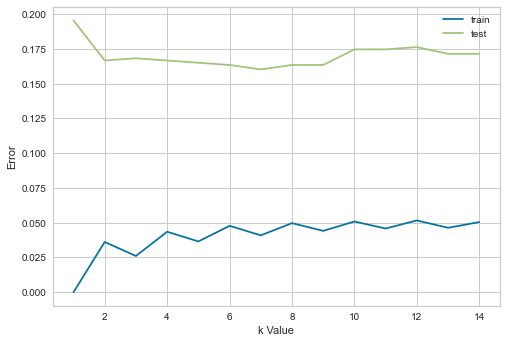

In [52]:
plot_K(X_smote_tomek, y_smote_tomek, X_test, y_test)

In [53]:
KNN_model = KNeighborsClassifier(n_neighbors=9)
#fitting the model with the processed data
KNN_model.fit(X_smote_tomek, y_smote_tomek)

KNeighborsClassifier(n_neighbors=9)

In [54]:
print('KNN accuracy score is: ' + str(KNN_model.score(X_test, y_test)))

KNN accuracy score is: 0.8365384615384616


In [55]:
KNN_model_predcited = KNN_model.predict(X_test)

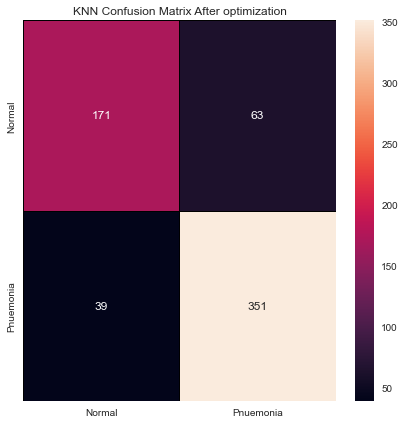

In [56]:
plot_cm(KNN_model_predcited, y_test, 'KNN Confusion Matrix After optimization')

In [57]:
SVM_param_grid = {
    'C':[0.1,1,100,1000],
    'kernel':['rbf','poly','sigmoid','linear'],
    'degree':[1,2,3,4,5,6],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
    }

In [58]:
SVM_grid_search = GridSearchCV(svm_smote_tomek, param_grid = SVM_param_grid, cv = 3, verbose=True, n_jobs=-1, refit=True)

In [59]:
SVM_grid_search.fit(X_smote_tomek, y_smote_tomek)


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=True)

In [60]:
SVM_grid_search.best_params_

{'C': 100, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [61]:
#getting the best model from the SVM grid search
best_SVM_model = SVM_grid_search.best_estimator_

In [62]:
print(best_SVM_model.score(X_test, y_test))

0.7980769230769231


In [63]:
#scoring the KNN model
print('KNN accuracy score is: ' + str(KNN_model.score(X_test, y_test)))

KNN accuracy score is: 0.8365384615384616


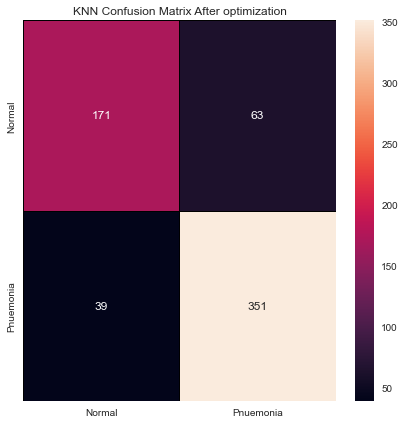

In [64]:
plot_cm(KNN_model_predcited, y_test, 'KNN Confusion Matrix After optimization')

In [65]:
print(classification_report(y_test, KNN_model_predcited))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       234
           1       0.85      0.90      0.87       390

    accuracy                           0.84       624
   macro avg       0.83      0.82      0.82       624
weighted avg       0.84      0.84      0.83       624



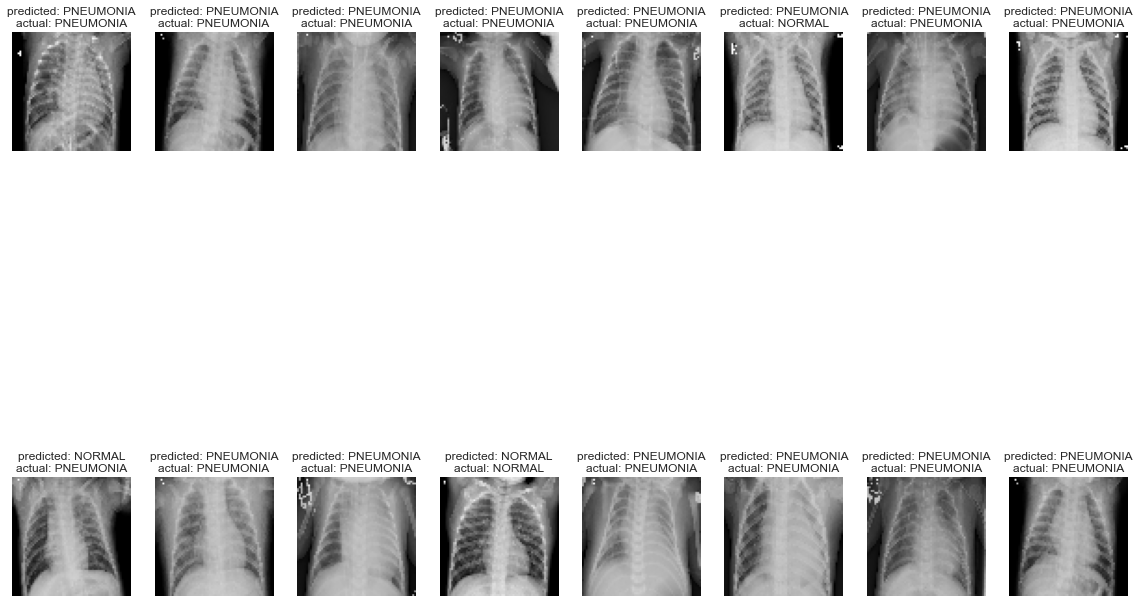

In [66]:
#flatten
X_visual = loaded_X_test.reshape([-1, np.product((64,64,3))])

#scaling
X_visual = sc.fit_transform(X_visual)

#PCA
X_visual = pca.transform(X_visual)


#we pull 16 random images from the test data set and make predictions on them
plt.figure(figsize=(20,15))
for n , i in enumerate(np.random.randint(0,len(X_visual),16)):
    plt.subplot(2,8,n+1)
    plt.imshow(loaded_X_test[i])
    plt.axis('off')
    plt.title('predicted: ' + str(getcode(KNN_model.predict([X_visual[i]]))) + '\n' + 'actual: '  + str(getcode(loaded_y_test[i])))

In [67]:
filename = '../models/finalized_model.sav'
pickle.dump(KNN_model, open(filename, 'wb'))


In [71]:
# convert this ipynb to py file
!ipython nbconvert --to script knn_01.ipynb

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] Converting notebook knn_01.ipynb to script
[NbConvertApp] Writing 13757 bytes to knn_01.py


In [1]:
i = 0 
for num in range(1000000000):
    i += 1 
i

1000000000